### Cardiovascular Disease Dataset
link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

There are 3 types of input features:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient

#### Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

###### All of the dataset values were collected at the moment of medical examination.

### Understanding of the problem

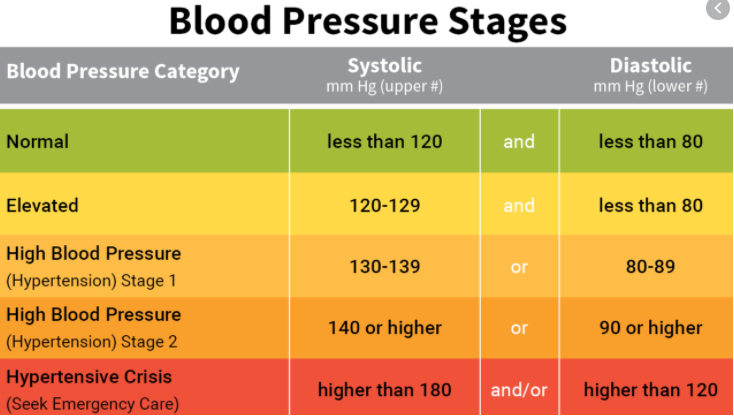

Key definitions:
* Systolic blood pressure - pressure exerted when blood is ejected into arteries. Normal systolic blood pressure is 120 mmHg or below

* Diastolic blood pressure - pressure blood exerts within arteries between heartbeats. Normal diastolic blood pressure is 80 mmHg or below

* High blood pressure = hypertension

* Primary hypertension - no known cause for high blood pressure and is the most common type of hypertension. Usually takes years to develop and is probably caused by a lifestyle, environment and how the body changes with age.

* Secondary hypertension - when a health problem or medicine is causing high blood pressure. Might be a result of kidney problems, sleep apnea, some medicines, thyroid or adrenal gland problems.

##### Over the years, research has found that both numbers are equally important in monitoring heart health. 
However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

##### High blood pressure (hypertension) is caused by:
* diet high in salt and/or cholesterol
* tobacco or drinking too much alcohol
* stress
* being overweight or obese
* older age (likelihood of high blood pressure increases with age)
* lack of physical activity
* chronic conditions - e.g. kidney and hormone problems, diabetes and high cholesterol
* family history (e.g. parents or close relatives with high blood pressure)
* insufficient intake of potassium, calcium, magnesium

##### Uncontrolled high blood pressure can lead to following complications:
* heart attack or stroke
* aneurysm
* heart failure
* weakened and narrowed blood vessels in your kidneys
* thickened, narrowed or torn blood vessels in the eyes
* metabolic syndrome
* trouble with memory or understanding
* dementia

### Objective: examine how following factors affect heart problems

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
#loading data and showing first 5 rows
data = pd.read_csv("C:/Users/Konrad/Desktop/DATA SCIENCE/Projekt Python - DataVirus/cardiovascular_disease_dataset/cardio_train.csv", delimiter = ";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [55]:
#last 5 rows
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [56]:
#how many rows and columns are in the dataset?
data.shape

(70000, 13)

In [57]:
#checking for number of unique values
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [58]:
#unique values in "cholesterol" column
data['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [59]:
#unique values in "gluc" column
data['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [60]:
#what columns are in the dataset?
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [61]:
#key characteristics of variables
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


###### Some bugs detected in the dataset:
* age in days, not in years
* minimum wage of weight (10) seems as too low
* both ap_hi and ap_lo should not bring any negative values
* max values of both ap_hi and ap_lo need adjustment

In [62]:
#changing age to 'years' instead of 'days'
data['age'] = data['age']/365
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [63]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
bmi = data['weight'] / ((data['height']/100)**2)
data['bmi'] = bmi
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


### Cleaning the dataset

In [65]:
#checking for null values across dataset
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [66]:
# deleting id column
data=data.drop(['id'], axis = 1)

In [67]:
# adjustment of the possible wrong value of ap_hi and ap_lo (divided by 10 or 100)
def ap_correction(ap_value):
    if ap_value >= 2000: return ap_value/100
    elif (ap_value > 300 and ap_value < 2000): return ap_value/10
    else: return np.abs(ap_value)
data['ap_hi'] = data.apply(lambda x: ap_correction(x['ap_hi']),axis=1)
data['ap_lo'] = data.apply(lambda x: ap_correction(x['ap_lo']),axis=1)

In [68]:
#both systolic and diastolic blood pressure should not be negative
data[data['ap_hi']<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


In [69]:
data[data['ap_lo']<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


In [70]:
#changing negative values into positive
data['ap_lo'] = data['ap_lo'].abs()
data['ap_hi'] = data['ap_hi'].abs()
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,126.696021,81.599887,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.759594,0.476838,8.210126,14.395757,18.053072,10.168647,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.583562,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [97]:
data = data.loc[data['bmi']>=15]
data = data.loc[data['bmi']<=60]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000
mean,53.345072,1.349822,164.442617,74.200902,127.023810,81.687693,1.367323,1.226658,0.088308,0.053853,0.803770,0.499935,27.473354
std,6.757112,0.476917,7.856249,14.248146,17.064576,9.841503,0.680738,0.572566,0.283744,0.225729,0.397147,0.500004,5.182275
min,29.583562,1.000000,125.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,48.405479,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,58.432877,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120482
max,64.967123,2.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


In [98]:
#both ap_hi and _ap_lo should be larger than 50
data = data.loc[data['ap_lo']>50]
data = data.loc[data['ap_lo']<=180]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000
mean,53.345072,1.349822,164.442617,74.200902,127.023810,81.687693,1.367323,1.226658,0.088308,0.053853,0.803770,0.499935,27.473354
std,6.757112,0.476917,7.856249,14.248146,17.064576,9.841503,0.680738,0.572566,0.283744,0.225729,0.397147,0.500004,5.182275
min,29.583562,1.000000,125.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,48.405479,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,58.432877,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120482
max,64.967123,2.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


In [99]:
#assumption: ap_hi<220 and ap_lo<150
data = data.loc[data['ap_hi']<250]
data = data.loc[data['ap_hi']>50]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000
mean,53.345072,1.349822,164.442617,74.200902,127.023810,81.687693,1.367323,1.226658,0.088308,0.053853,0.803770,0.499935,27.473354
std,6.757112,0.476917,7.856249,14.248146,17.064576,9.841503,0.680738,0.572566,0.283744,0.225729,0.397147,0.500004,5.182275
min,29.583562,1.000000,125.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,48.405479,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,58.432877,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120482
max,64.967123,2.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


In [100]:
#assumption: height should be at least 100cm and not excess 230cm
data = data.loc[data['height']>120]
data = data.loc[data['height']<250]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000
mean,53.345072,1.349822,164.442617,74.200902,127.023810,81.687693,1.367323,1.226658,0.088308,0.053853,0.803770,0.499935,27.473354
std,6.757112,0.476917,7.856249,14.248146,17.064576,9.841503,0.680738,0.572566,0.283744,0.225729,0.397147,0.500004,5.182275
min,29.583562,1.000000,125.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,48.405479,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,58.432877,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120482
max,64.967123,2.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


In [101]:
#assumption: weight should be at least 35kg
data = data.loc[data['weight']>35]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000,69541.000000
mean,53.345072,1.349822,164.442617,74.200902,127.023810,81.687693,1.367323,1.226658,0.088308,0.053853,0.803770,0.499935,27.473354
std,6.757112,0.476917,7.856249,14.248146,17.064576,9.841503,0.680738,0.572566,0.283744,0.225729,0.397147,0.500004,5.182275
min,29.583562,1.000000,125.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,48.405479,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370238
75%,58.432877,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120482
max,64.967123,2.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


#### Checking some scatter plots - visualization of outliers

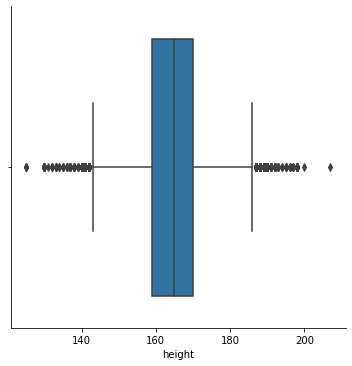

In [48]:
sns.catplot(x='height', kind='box', data=data)

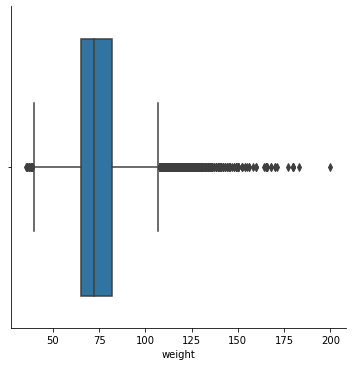

In [49]:
sns.catplot(x='weight', kind='box', data=data)

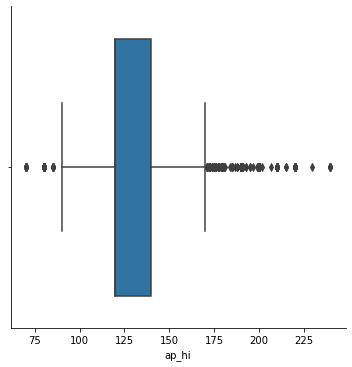

In [50]:
sns.catplot(x='ap_hi', kind='box', data=data)

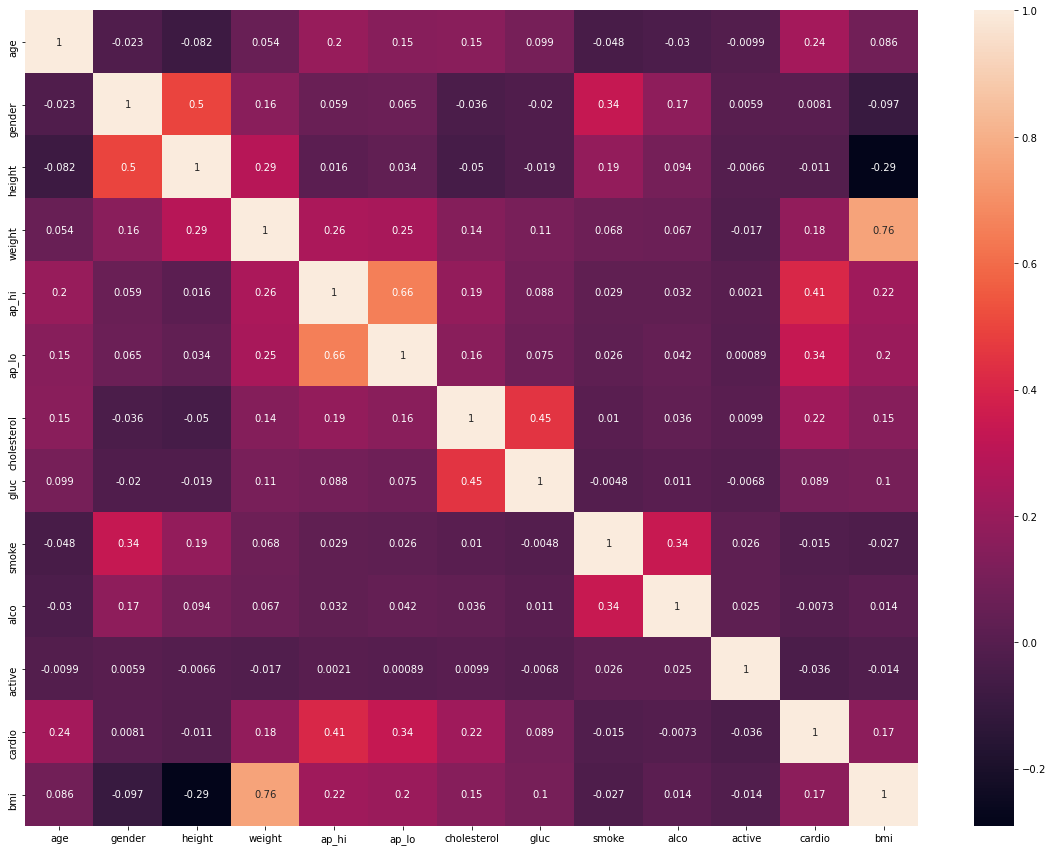

In [83]:
#correlation matrix
plt.subplots(figsize=(20,15))
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
pass

#### Plotting some distribution charts

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


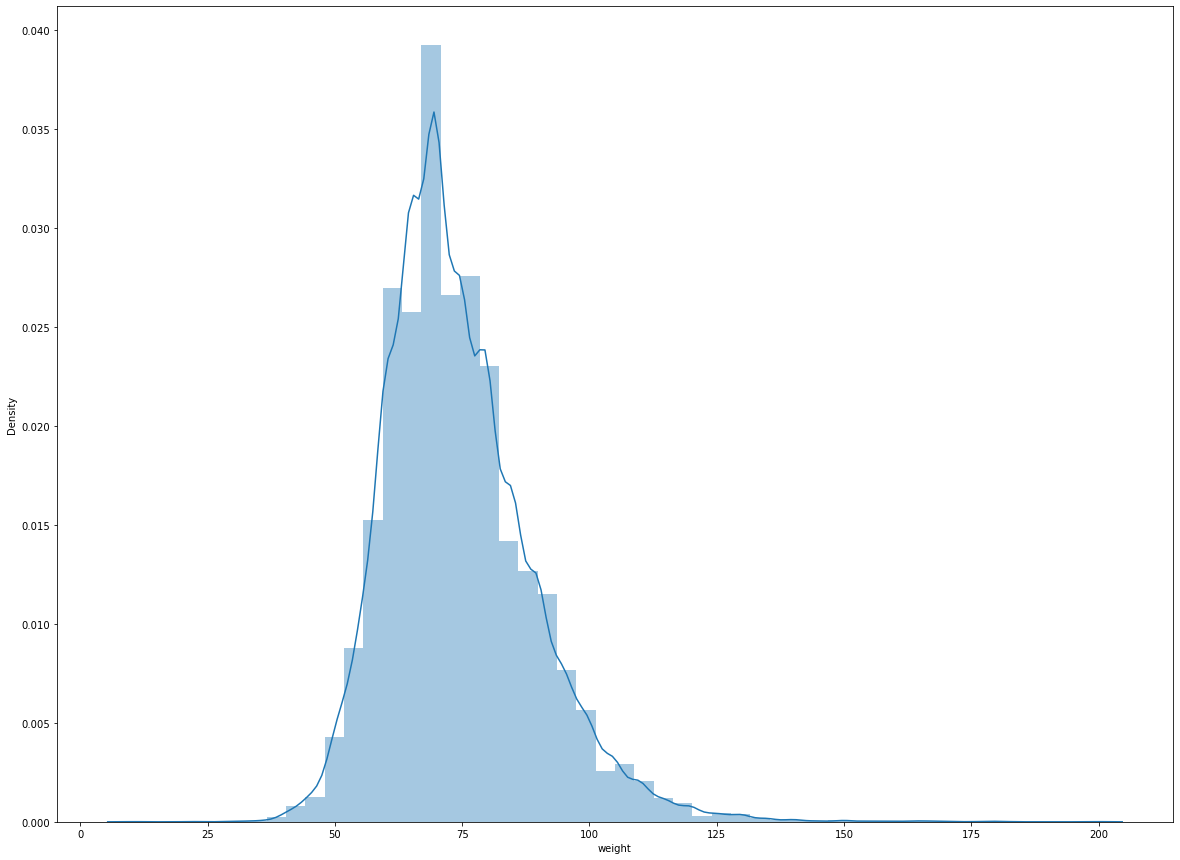

In [85]:
#distribution of weight
plt.subplots(figsize=(20,15))
sns.distplot(data['weight'])
pass

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


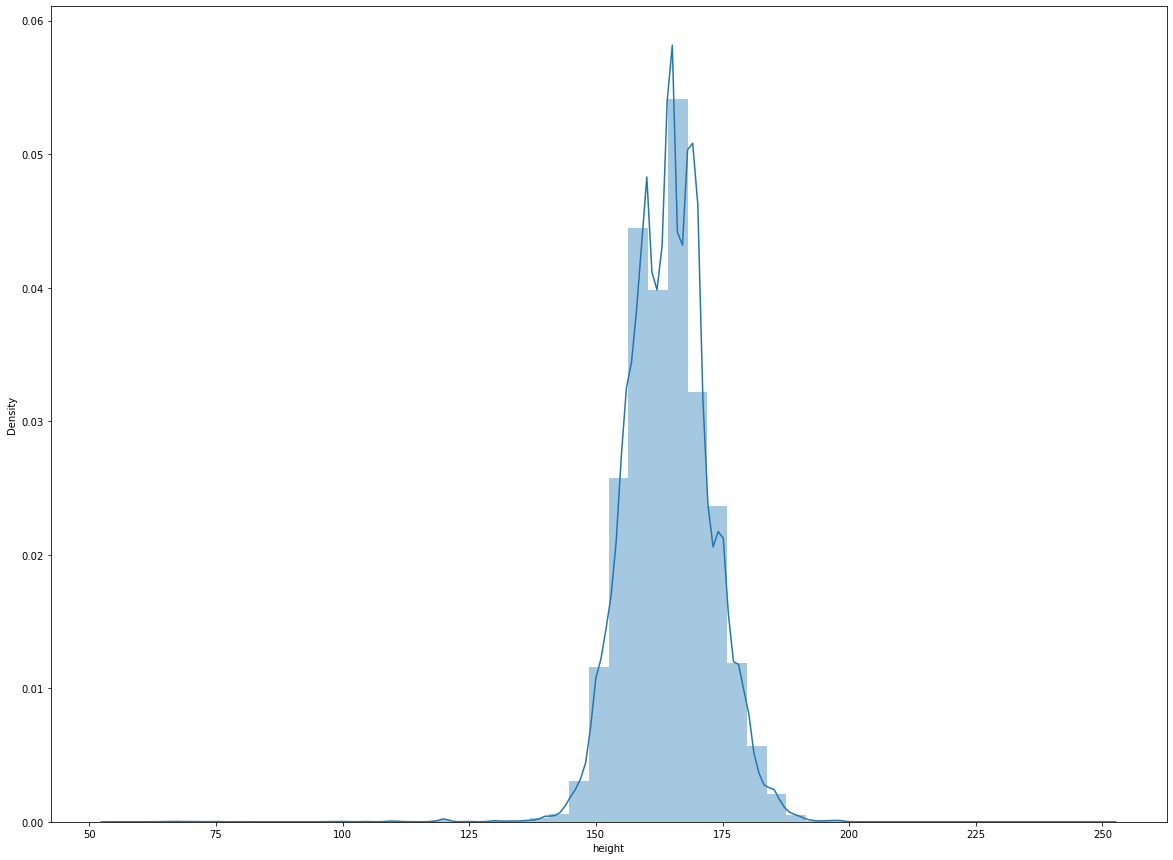

In [86]:
#distribution of height
plt.subplots(figsize=(20,15))
sns.distplot(data['height'])
pass

In [104]:
data.to_csv('eda.csv')